In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10000
j = np.random.standard_exponential((n,4))
m4j = j.sum(axis=1)
# pairings[view][dijet][jet]
pairings = [[[0,1],[2,3]],
            [[0,2],[1,3]],
            [[0,3],[1,2]]]

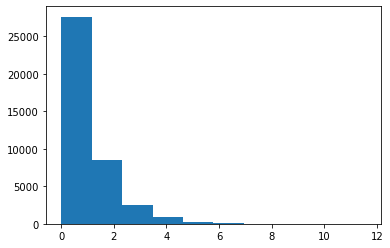

In [3]:
bins, entries, _ = plt.hist(j.reshape(n*4))

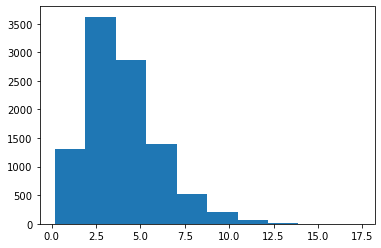

In [4]:
bins, entries, _ = plt.hist(m4j)

In [5]:
j[:,pairings].shape

(10000, 3, 2, 2)

In [6]:
# construct all sums over jets in dijets
d = j[:,pairings].sum(axis=3) # [event,view,dijet,jet] sum over jet index

In [7]:
# compute mass difference between boson candidates "B" in each view
dBB = abs(d[:,:,0]-d[:,:,1]) 

In [8]:
# select the view with the smallest dijet mass difference
selected_view = dBB.argmin(axis=1)

In [9]:
selected_dijets = d[np.arange(n), selected_view]

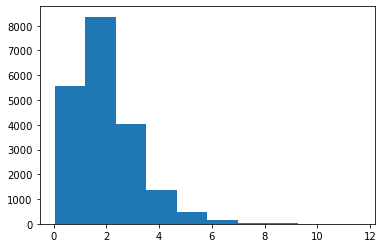

In [10]:
bins, entries, _ = plt.hist(selected_dijets.reshape(n*2))

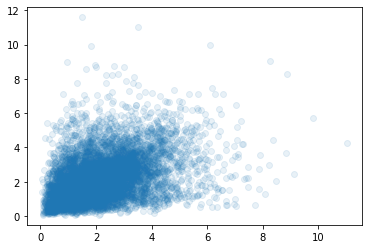

In [11]:
fig, (ax) = plt.subplots(nrows=1)
ax.scatter(selected_dijets[:,0], selected_dijets[:,1], alpha=0.1)

In [12]:
# Now we want to split the mass plane into bins with equal event number
# The easiest option is to alternate splittings along x and y
def split(a, axis=0, box=np.array([[0.,10.],[0.,10.]])):
    s = np.quantile(a[:,axis], 0.5) # find split along axis

    # make boundary array with x,y points to define the line 
    boundary = np.array([[0.,0.],[0.,0.]]) # [[x1,x2],[y1,y2]]
    boundary[axis] = np.array([s,s])
    other_axis = (axis+1)%2
    boundary[other_axis] = box[other_axis]
    
    mask = a[:,axis]<s
    lower, upper = a[mask], a[~mask] # get lower and upper halves
    return lower, boundary, upper

In [13]:
# first split into halves along x
box = np.array([[0.,10.],[0.,10.]])
lx, sx, ux = split(selected_dijets, axis=0, box=box)

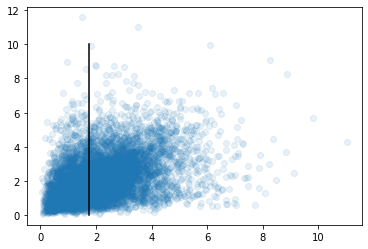

In [14]:
ax.plot(sx[0],sx[1], color='k')
fig

In [15]:
# now split those halves into quarters along y
split_value = sx[0,0]
box_l = np.array([[box[0,0], split_value], box[1]])
box_u = np.array([[split_value, box[0,1]], box[1]])
lxly, lxsy, lxuy = split(lx, axis=1, box=box_l)
uxly, uxsy, uxuy = split(ux, axis=1, box=box_u)

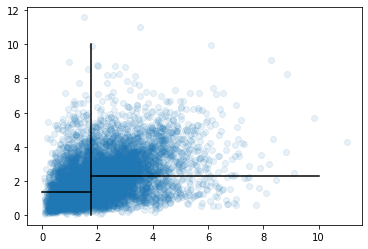

In [16]:
ax.plot(lxsy[0],lxsy[1], color='k')
ax.plot(uxsy[0],uxsy[1], color='k')
fig

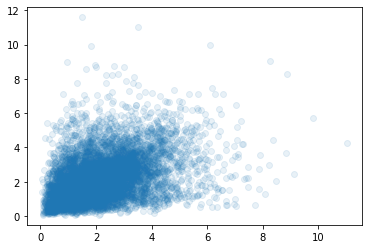

In [17]:
fig, (ax) = plt.subplots(nrows=1)
ax.scatter(selected_dijets[:,0], selected_dijets[:,1], alpha=0.1)
bins = []
# let's define a recursive function to do this until the quantiles reach some target number of events
def recursive_split(a, axis=0, box=np.array([[0.,10.],[0.,10.]]), threshold=100):
    if a.shape[0]>threshold:
        lower, boundary, upper = split(a, axis=axis, box=box)
        
        ax.plot(boundary[0],boundary[1], color='k')

        split_value = boundary[axis,axis]
        next_axis = (axis+1)%2
        
        box_l = box.copy()
        box_u = box.copy()
        box_l[axis, 1] = split_value # box_l ranges from lower bound of box up to split
        box_u[axis, 0] = split_value # box_u ranges from split up to upper bound of box
        
        recursive_split(lower, axis=next_axis, box=box_l)
        recursive_split(upper, axis=next_axis, box=box_u)
    else:
        bins.append(box)

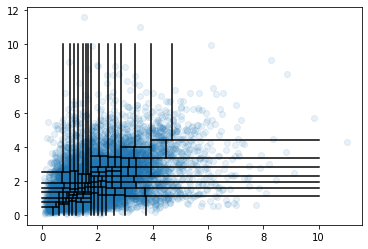

In [18]:
recursive_split(selected_dijets,threshold=100)
fig

In [19]:
len(bins)

128

In [20]:
# each bin is specified by the x and y range of the quantile
bins[50]

array([[1.31166509, 1.44076313],
       [1.58706517, 1.88707868]])

In [23]:
# and they should all contain the same number of events
mask  = (selected_dijets[:,0]>bins[50][0,0])
mask &= (selected_dijets[:,0]<bins[50][0,1])
mask &= (selected_dijets[:,1]>bins[50][1,0])
mask &= (selected_dijets[:,1]<bins[50][1,1])
print(selected_dijets[mask].shape)

mask  = (selected_dijets[:,0]>bins[37][0,0])
mask &= (selected_dijets[:,0]<bins[37][0,1])
mask &= (selected_dijets[:,1]>bins[37][1,0])
mask &= (selected_dijets[:,1]<bins[37][1,1])
print(selected_dijets[mask].shape)

(78, 2)
(78, 2)
